# TEST HelloFresh France

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SectionA – Programming basics

In [9]:
data = pd.read_excel('/Users/komlan/Downloads/HF_DataBI_Engineer_Case_Study_Data.xlsx')
data

,meal_code,meals
0,201,4193
1,201,2322
2,201,1019
3,202,3449
4,202,1901
...,...,...
310,222,114
311,222,46
312,223,177
313,223,69


### Question 1 : How many meals (column “meals”) correspond to meal_code == 208?

In [14]:
number_neals = data[data.meal_code == 208].meals.sum()
number_neals

9563

### Question 2 : What are the top 3 “meal_code”s based on number of meals (column “meals”) and how many meals for each of those three?

In [26]:
data_top = data.groupby(['meal_code']).sum().reset_index()
top_3_meals = data_top.sort_values(by=['meals'], ascending=False)[:3]
top_3_meals

,meal_code,meals
2,203,24897
0,201,23950
1,202,20085


### Question 3 : Please visualize the top 10 “meal_code” based on number of meals in column “meals”?

In [27]:
top_10_meals = data_top.sort_values(by=['meals'], ascending=False)[:10]
#Sort values based on meal_code on the abscisse
top_10_meals = top_10_meals.sort_values(by=['meal_code'])
top_10_meals

,meal_code,meals
0,201,23950
1,202,20085
2,203,24897
3,204,19101
4,205,15772
5,206,12177
10,211,11576
12,213,12359
15,216,13130
16,217,10670


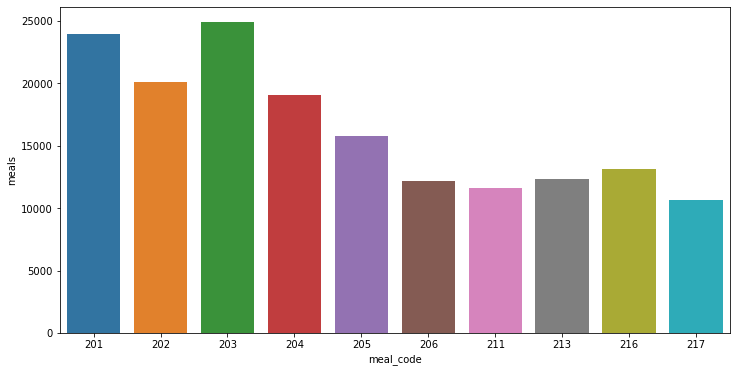

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="meal_code", y="meals", data=top_10_meals, ci=68)

### Question 4 : Please add a new column named (meals_new) which adds 20% of meals if meal_code is 201, otherwise it adds 10% to the other meal_code meals. The new column should be rounded to the nearest integer and stored as an integer. Save the table in a variable and print the first 6 lines

In [40]:
data['meals_new'] = data.apply(lambda row: round(row['meals'] + (row['meals'] * 20) / 100)  if row['meal_code'] == 201 else round(row['meals'] + (row['meals'] * 10) / 100), axis=1)
data.head(6)

,meal_code,meals,meals_new
0,201,4193,5032
1,201,2322,2786
2,201,1019,1223
3,202,3449,3794
4,202,1901,2091
5,202,923,1015


### Question 5 : Create a dictionary with the keys being meal_code and the values being a list with two elements, average meals (as integer value) and maximum meals. Use values from the meals_new column that you created above. Please print the dictionary (example: dict = {201:[1916,5032], 202...})

In [73]:
from statistics import mean
data_dic = data.groupby(['meal_code']).agg(list).reset_index()
data_dic['average'] = data_dic.meals_new.apply(lambda meals_numbers: round(mean(meals_numbers)))
data_dic['maximum'] = data_dic.meals_new.apply(lambda meals_numbers: round(max(meals_numbers)))
data_dic['minimum'] = data_dic.meals_new.apply(lambda meals_numbers: round(min(meals_numbers)))
dic = {}
for i, row in data_dic.iterrows():
    dic[row['meal_code']] = [row['average'], row['maximum']]
dic

{201: [1916, 5032],
 202: [1473, 3794],
 203: [1826, 5423],
 204: [1401, 3929],
 205: [1156, 2849],
 206: [893, 1872],
 207: [770, 2021],
 208: [701, 2142],
 209: [622, 1643],
 210: [274, 710],
 211: [849, 2191],
 212: [726, 1952],
 213: [906, 2311],
 214: [466, 1248],
 215: [545, 1378],
 216: [963, 2482],
 217: [782, 2046],
 218: [148, 290],
 221: [154, 345],
 222: [104, 221],
 223: [76, 195]}

### Question 6 : Please copy the dictionary above and store it in a new variable. Add minimum meals_new element to the list of each meal_code in the dictionary. Please print key 201 from previous dictionary as well as from this new dictionary

In [77]:
dic_new = dict(dic)
for i, row in data_dic.iterrows():
    dic_new[row['meal_code']] = dic_new[row['meal_code']]+[row['minimum']]

print(dic_new[201])#the minimum at the end of the list
print(dic[201])

[1916, 5032, 432]
[1916, 5032]


## SectionB – Programming logic and Data Structure

### Question 7 : Please develop a script that can print a list with the shortest path from Start to Goal. Consider each “X” as a wall that cannot be passed. (answer = [B2,B3,B4, C4....])

In [80]:
section_b_data = pd.read_excel('/Users/komlan/Downloads/HF_DataBI_Engineer_Case_Study_Data.xlsx', sheet_name="SectionB")
np.array(section_b_data)

array([[1, 'X', 'X', 'X', 'X', 'X', 'X', 'X'],
       [2, 'X', 'Start', 'X', nan, nan, nan, 'X'],
       [3, 'X', nan, 'X', nan, 'X', nan, 'X'],
       [4, 'X', nan, nan, nan, 'X', nan, 'X'],
       [5, 'X', nan, 'X', nan, nan, nan, 'X'],
       [6, 'X', nan, 'X', nan, 'X', nan, 'X'],
       [7, 'X', nan, nan, nan, 'X', 'Goal', 'X'],
       [8, 'X', 'X', 'X', 'X', 'X', 'X', 'X']], dtype=object)

In [87]:
import collections
def best_path(grid, start):
    queue = collections.deque([[start]])
    seen = set([start])
    while queue:
        path = queue.popleft()
        x, y = path[-1]
        if grid[y][x] == goal:
            return path
        for x2, y2 in ((x+1,y), (x-1,y), (x,y+1), (x,y-1)):
            if 0 <= x2 < width and 0 <= y2 < height and grid[y2][x2] != wall and (x2, y2) not in seen:
                queue.append(path + [(x2, y2)])
                seen.add((x2, y2))

In [88]:
start, wall, clear, goal = "+", "#", ".", "*"

grid = ["..........",
        "..+#...##.",
        "..##...#..",
        ".....###..",
        "......*..."]
path = best_path(grid, (2, 3))
path 

[(5, 2), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4)]

## Section C

In [114]:
section_c1_data = pd.read_excel('/Users/komlan/Downloads/HF_DataBI_Engineer_Case_Study_Data.xlsx', sheet_name="SectionC_1")
section_c2_data = pd.read_excel('/Users/komlan/Downloads/HF_DataBI_Engineer_Case_Study_Data.xlsx', sheet_name="SectionC_2")
section_c3_data = pd.read_excel('/Users/komlan/Downloads/HF_DataBI_Engineer_Case_Study_Data.xlsx', sheet_name="SectionC_3")


In [119]:
section_c1_data.Week = section_c1_data.Week.apply(lambda x: 'Week '+str(x))
meal_week_data = section_c1_data[['Week','Sales (QTY)','Sales Price (Euros)']].groupby(['Week']).sum().reset_index()
meal_week_data

,Week,Sales (QTY),Sales Price (Euros)
0,Week Week 1,943,100
1,Week Week 2,900,110
2,Week Week 3,768,90
3,Week Week 4,720,130


<AxesSubplot:xlabel='Week', ylabel='Sales (QTY)'>

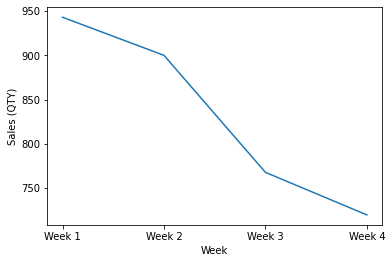

In [117]:
sns.lineplot(data=meal_week_data, x="Week", y="Sales (QTY)")
#We remark that the quantity sold during the week decrease

<AxesSubplot:xlabel='Week', ylabel='Sales Price (Euros)'>

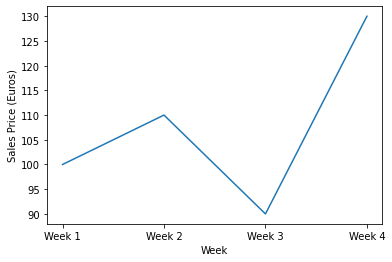

In [118]:
sns.lineplot(data=meal_week_data, x="Week", y="Sales Price (Euros)")
#the turnover on the week four is the higest one

In [ ]:
section_c_data = pd.merge(section_c1_data, section_c2_data, on='Meal_code', how='inner')
section_c_data = pd.merge(section_c_data, section_c3_data, on='Ingredients', how='inner')
section_c_data.Week = section_c_data.Week.apply(lambda x: 'Week '+str(x))
section_c_data

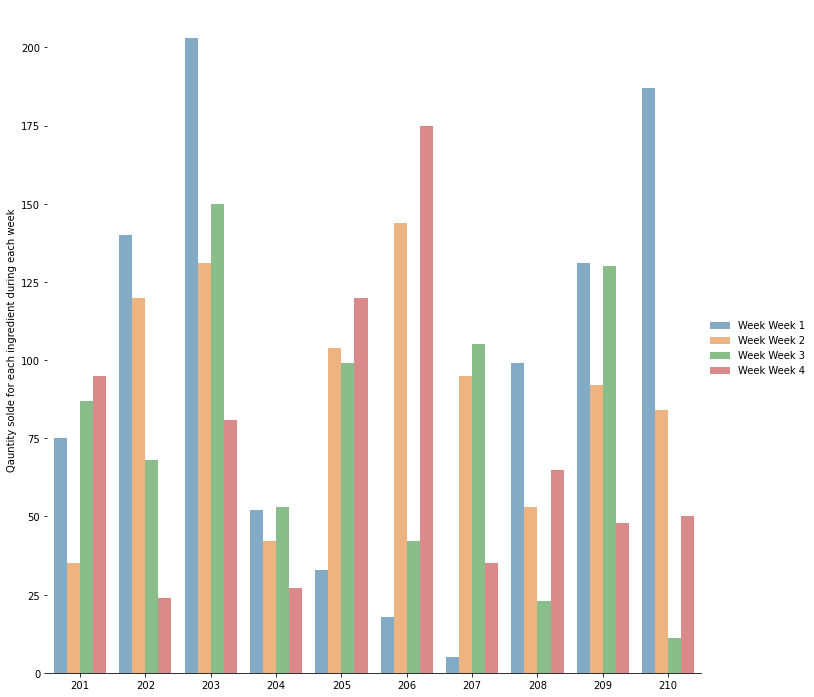

<Figure size 864x432 with 0 Axes>

In [120]:
#Evolution of the sale 
g = sns.catplot(
    data=section_c1_data, kind="bar",
    x="Meal_code", y="Sales (QTY)", hue="Week",
    ci="sd", alpha=.6, height=10
)
plt.figure(figsize=(12, 6))
g.despine(left=True)
g.set_axis_labels("", "Qauntity solde for each ingredient during each week")
g.legend.set_title("")

In [121]:
2022-1992

30